In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [31]:
texts = pd.read_csv('scraper/canebiere.csv')


In [33]:
texts.shape

(615, 7)

In [34]:
texts.isna().sum()

author             0
date               0
full_text          0
html               0
nb_commentaires    0
title              0
url                0
dtype: int64

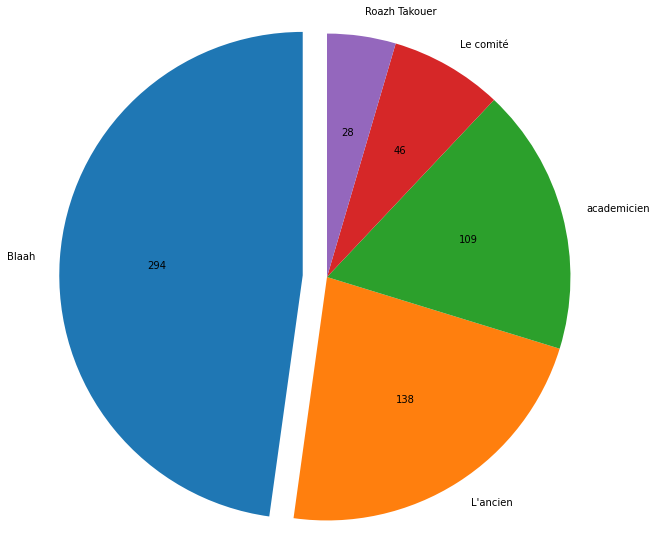

In [35]:
# List of authors
authors = texts['author'].value_counts().reset_index().values
list_of_authors = [x[0] for x in authors]

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
sizes = [x[1] for x in authors]
explode = (0.1, 0, 0, 0, 0) 
total = sum(sizes)

fig1, ax1 = plt.subplots(figsize=(10,10))
ax1.pie(sizes, explode=explode, labels=list_of_authors,
        autopct=lambda p: '{:.0f}'.format(p * total / 100),
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [36]:
import spacy
fr = spacy.load('fr_dep_news_trf')

In [ ]:
texts['nb_tokens'] = texts['full_text'].apply(lambda x: len(fr(x)))

([], [])

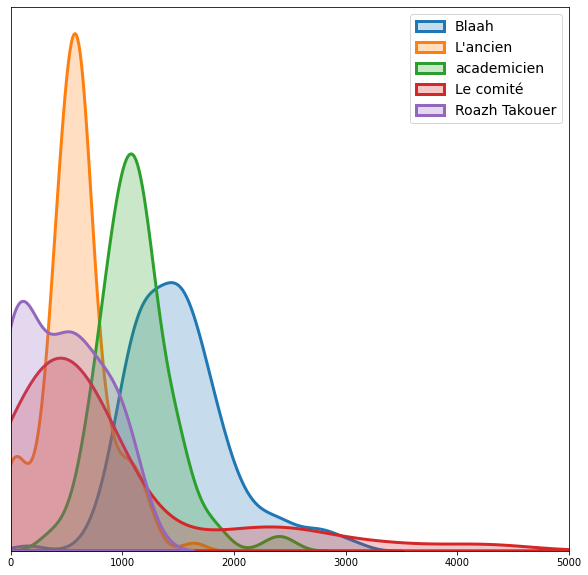

In [11]:
plt.figure(figsize=(10,10))

# Iterate through the authors
for label in list_of_authors:
    subset = texts[texts['author'] == label]
    
    # Draw the density plot
    ax = sns.distplot(subset['nb_tokens'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3, 'shade': True},
                 label = label)
    ax.set_xlim((0,5000))
    
# Plot formatting
plt.legend(prop={'size': 14})
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.yticks([])


Text(0, 0.5, '')

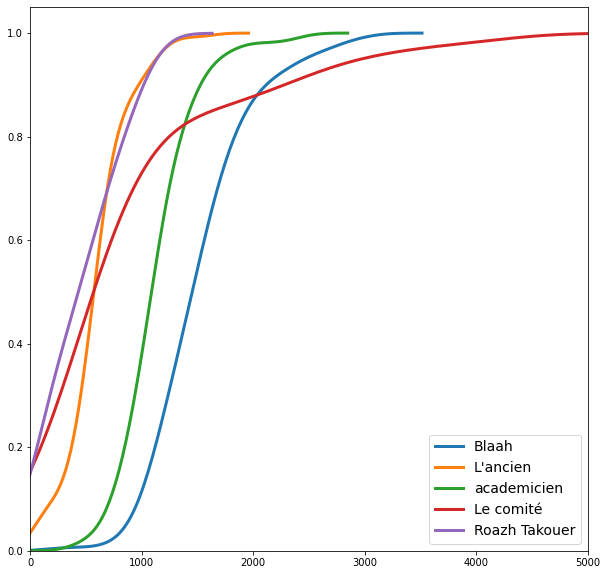

In [12]:
plt.figure(figsize=(10,10))

# Iterate through the authors
for label in list_of_authors:
    subset = texts[texts['author'] == label]
    
    # Draw the density plot
    ax = sns.distplot(subset['nb_tokens'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3, 'shade': False, 'cumulative': True},
                 label = label)
    ax.set_xlim((0,5000))
    
# Plot formatting
plt.legend(prop={'size': 14})
plt.title('')
plt.xlabel('')
plt.ylabel('')


# Academies de Blaah

In [19]:
texts['count'] = 1

In [22]:
texts['date'] = pd.to_datetime(texts['date'])

In [23]:
texts = texts.set_index('date')

<AxesSubplot:xlabel='date'>

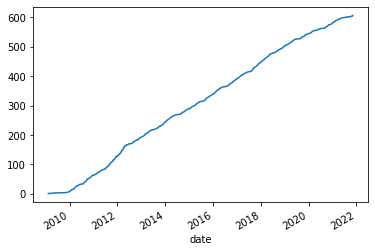

In [28]:
texts['count'].sort_index(ascending=True).cumsum().plot()

In [27]:
texts.head()

,author,full_text,nb_commentaires,title,url,nb_tokens,count
date,,,,,,,
2021-04-24,Blaah,"Aïoli les sapiens, Le football se trouve à u...",5.0,"Reims-OM (1-3), La Canebière académie trouve s...",https://horsjeu.net/academies/reims-om-1-3-la-...,1742,1
2021-01-05,Blaah,"Aïoli les sapiens, Plus que quatre matchs av...",2.0,"OM-Strasbourg (1-1), La Canebière académie s’e...",https://horsjeu.net/academies/om-strasbourg-1-...,1285,1
2021-10-05,Blaah,"Aïoli les sapiens, Signe qu’une ère d’amour ...",6.0,"Saint-Étienne-OM (1-0), La Canebière académie ...",https://horsjeu.net/academies/saint-etienne-om...,1370,1
2021-05-17,Blaah,"Aïoli les sapiens, Après avoir gâché contre ...",7.0,"OM-Angers (3-2), La Canebière académie sauve l...",https://horsjeu.net/academies/om-angers-3-2-la...,1910,1
2021-05-24,Blaah,"Aïoli les sapiens, Si l’enjeu sportif reste ...",1.0,Metz-OM (1-1) : la Canebière Académie fait ses...,https://horsjeu.net/academies/metz-om-1-1-la-c...,1874,1
